# Support Vector Rregression

In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
#import sys
#sys.path.append(path) 

In [3]:
path_=  'C:/Users/felipe/Documents/Brain/Brain_Aging/'
import sys
sys.path.append(path_) 

In [4]:
from sklearn.svm import SVR
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class SVRRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="SVR"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml = SVR
        if params is None:
            self.params = {
                'kernel': 'rbf',
                'C': 1.0,
                'epsilon': 0.1,
                'gamma': 'scale'
            }
        if params_space is None:
            self.params_space = {
                'C': Real(0.01, 100.0, prior='log-uniform'),
                'gamma': Real(0.01, 10.0, prior='log-uniform'),
                'epsilon': Real(0.001, 1.0),
                'kernel': Categorical(['linear', 'rbf', 'poly'])
            }

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# CN y AD pvalue< 0.001 (56 features)
features =['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'IAF_OCC_right']


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Aging/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Aging/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Aging/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Aging/MCI_freq.xlsx'
file_path_PD = f'{path}Brain_Aging/PD_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)
df_PD = pd.read_excel(file_path_PD)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)
df_PD_filtrado = df_PD[(df_PD['Age'] >= 50) & (df_PD['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID-unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID-unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID-unique"]

X_PD = df_PD_filtrado[features]
y_PD = df_PD_filtrado["Age"]
ID_PD = df_PD_filtrado["ID-unique"]


X_combined = pd.concat([X_CN, X_AD, X_FTD, X_MCI, X_PD], axis=0).reset_index(drop=True)
#X_combined = pd.concat([X_CN, X_AD], axis=0).reset_index(drop=True)
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_AD_scaled = scaler.transform(X_AD)
X_FTD_scaled = scaler.transform(X_FTD)
X_MCI_scaled = scaler.transform(X_MCI)
X_PD_scaled = scaler.transform(X_PD)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)
X_AD_scaled = pd.DataFrame(X_AD_scaled, columns=X_AD.columns)
X_FTD_scaled = pd.DataFrame(X_FTD_scaled, columns=X_FTD.columns)
X_MCI_scaled = pd.DataFrame(X_MCI_scaled, columns=X_MCI.columns)
X_PD_scaled = pd.DataFrame(X_PD_scaled, columns=X_PD.columns)

In [7]:
df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)
df_concatenado_PD = pd.concat([X_PD, y_PD, ID_PD], axis=1, ignore_index=False)

lista_dfs = [df_concatenado_AD, df_concatenado_FTD, df_concatenado_MCI,df_concatenado_PD]

In [20]:
model = SVRRegressor()
Plotters = Plotter()

# Hyperparameter Tuning

In [21]:
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_squared_error')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [11]:
with open(f'{path_}Opt_Model/opt_SVR.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [22]:
score = opt_model.cv_results_['mean_test_score'][:50]


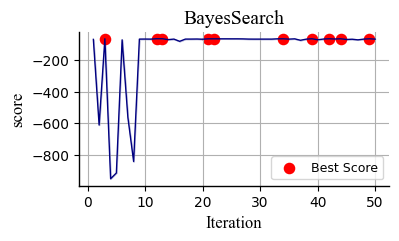

Top 1: Iteration 12, Score -65.47199420555015
Top 2: Iteration 13, Score -65.51962112252846
Top 3: Iteration 3, Score -65.5467799939501
Top 4: Iteration 39, Score -65.69216138813835
Top 5: Iteration 42, Score -65.71492056873663
Top 6: Iteration 44, Score -65.77193656698786
Top 7: Iteration 49, Score -65.86309306238621
Top 8: Iteration 34, Score -65.98275344872937
Top 9: Iteration 22, Score -66.10413420267489
Top 10: Iteration 21, Score -66.10520144571504


In [23]:
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [24]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'C': 0.6970788961801978,
  'epsilon': 0.9199330401589847,
  'gamma': 0.02132415389189398,
  'kernel': 'rbf'},
 {'C': 0.6378424174462362,
  'epsilon': 0.9199909358466131,
  'gamma': 0.02150971949254121,
  'kernel': 'rbf'},
 {'C': 0.6016307829589929,
  'epsilon': 0.9188037991477077,
  'gamma': 0.02063371728225427,
  'kernel': 'rbf'},
 {'C': 0.7367243494249651, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.9793918081379521,
  'epsilon': 0.9227686265176647,
  'gamma': 0.01,
  'kernel': 'rbf'},
 {'C': 1.2239759499933736, 'epsilon': 1.0, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.3663259444661241,
  'epsilon': 0.9220765824803752,
  'gamma': 0.01,
  'kernel': 'rbf'},
 {'C': 0.238731066335392,
  'epsilon': 1.0,
  'gamma': 0.0231495641400549,
  'kernel': 'rbf'},
 {'C': 0.17882344154854157,
  'epsilon': 0.9272705689460891,
  'gamma': 0.02150766554887858,
  'kernel': 'rbf'},
 {'C': 0.1784160308667322,
  'epsilon': 0.927422685156672,
  'gamma': 0.021516342495753522,
  'kernel': 'rbf'}

# Training

In [25]:
results_labels_df_CN, results_labels_list, results= model.trainer(df_concatenado_CN, lista_dfs, n_splits=10, n_iterations=20, params_=best_params_[0])

C:\Users/felipe/Documents/Brain/Brain_Aging\base_regressor.py:162: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_CN = pd.concat([results_labels_df_CN, temp_CN_df], ignore_index=True)
C:\Users/felipe/Documents/Brain/Brain_Aging\base_regressor.py:193: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_list[j] = pd.concat([results_labels_list[j], temp_pat_df], ignore_index=True)
C:\Users/felipe/Documents/Brain/Brain_Aging\base_regressor.py:193: FutureWarning: The behavio

In [26]:
results_labels_df_AD=results_labels_list[0]
results_labels_df_FTD=results_labels_list[1]
results_labels_df_MCI=results_labels_list[2]
results_labels_df_PD=results_labels_list[3]

results_labels_df_total = [results_labels_df_CN, results_labels_df_AD, results_labels_df_FTD,results_labels_df_MCI,results_labels_df_PD]

results_avg_list = model.avg_list(results_labels_df_total)

results_avg_list_CN = results_avg_list[0]
results_avg_list_AD = results_avg_list[1]
results_avg_list_FTD = results_avg_list[2]
results_avg_list_MCI = results_avg_list[3]
results_avg_list_PD = results_avg_list[4]

df_CN_seleccion = df_CN_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = results_avg_list_CN.merge(df_CN_seleccion, on='ID-unique', how='left')

df_AD_seleccion = df_AD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = results_avg_list_AD.merge(df_AD_seleccion, on='ID-unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = results_avg_list_CN.merge(df_FTD_seleccion, on='ID-unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = results_avg_list_MCI.merge(df_MCI_seleccion, on='ID-unique', how='left')

df_PD_seleccion = df_PD_filtrado[['ID-unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_PD_combined = results_avg_list_PD.merge(df_PD_seleccion, on='ID-unique', how='left')


In [17]:
# Guardar los dataframes combinados en archivos CSV
df_CN_combined.to_csv('df_CN_combined.csv', index=False)
df_AD_combined.to_csv('df_AD_combined.csv', index=False)
df_FTD_combined.to_csv('df_FTD_combined.csv', index=False)
df_MCI_combined.to_csv('df_MCI_combined.csv', index=False)
df_PD_combined.to_csv('df_PD_combined.csv', index=False)


C:\Users/felipe/Documents/Brain/Brain_Aging\Plotter.py:500: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felipe/Documents/Brain/Brain_Aging\Plotter.py:518: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


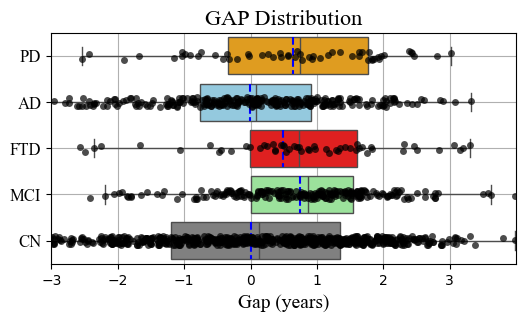

In [27]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(results_avg_list[1]['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(results_avg_list[2]['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(results_avg_list[3]['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(results_avg_list[0]['GAP_corrected'])
corrected_gap_PD = pd.to_numeric(results_avg_list[4]['GAP_corrected'])

data = {
    'Error': np.concatenate([corrected_gap_PD, corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['PD'] * len(corrected_gap_PD) + ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'PD': 'orange',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

CN - Pendiente: 0.03810944910253366, Intercepto: 63.57974348258243
AD - Pendiente: 0.012938399992255743, Intercepto: 65.77075829931046
FTD - Pendiente: -0.0544122761378131, Intercepto: 70.6284220164211
MCI - Pendiente: 0.0014831555431378918, Intercepto: 66.82305966123252
PD - Pendiente: 0.03958104917753392, Intercepto: 64.07453114138295


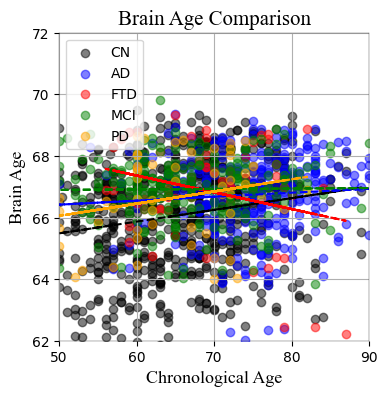

In [28]:
results_avg_CN = results_avg_list[0][['y_labels', 'y_pred']].copy()
results_avg_AD = results_avg_list[1][['y_labels', 'y_pred']].copy()
results_avg_FTD = results_avg_list[2][['y_labels', 'y_pred']].copy()
results_avg_MCI = results_avg_list[3][['y_labels', 'y_pred']].copy()
results_avg_PD = results_avg_list[4][['y_labels', 'y_pred']].copy()

df_list = [results_avg_CN, results_avg_AD, results_avg_FTD, results_avg_MCI, results_avg_PD]
colors = {'CN': 'black', 'AD': 'blue', 'FTD': 'red', 'MCI': 'green', 'PD': 'orange'}
labels = ['CN', 'AD', 'FTD', 'MCI', 'PD']
Plotters.plot_regression_diagnosis(df_list=df_list, colors=colors, title='Brain Age Comparison',labels=labels,x_ticks_step=10,y_ticks_step=2,x_min_limit=50,y_min_limit=62,x_max_limit=90,y_max_limit=72,line_ideal=False, alpha=0.5, xlabel='Chronological Age',ylabel='Brain Age',  font='Times New Roman', weight='normal', x_size=4,y_size=4, legend=True, fontsize=13, mode=3,xticks =1,yticks=1)